In [1]:
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("df_n_frutos_cum.csv")

df = df.sort_values(["tratamento", "bloco", "colheita"])

df.head(3)

,tratamento,bloco,colheita,n_frutos,n_frutos_cum,peso,comprimento,largura
0,1,1,1,1.5,1.5,309.0,62.333333,82.333333
1,1,1,2,6.5,8.0,1489.0,60.769231,77.230769
2,1,1,3,1.5,9.5,340.5,51.000000,79.000000


In [3]:
list_columns = ["colheita", "n_frutos", "n_frutos_cum", "peso", "comprimento", "largura"]

index_variables = ["tratamento", "bloco"]

# Tabela com apenas os índices
df_grouped = df.groupby(index_variables).size().reset_index().rename(columns = {0:"tam_serie"})

for column in list_columns:
    if(column in df.columns):
        column_grouped = df.groupby(index_variables)[column].apply(lambda x : np.array(list(x))).reset_index()
        df_grouped = df_grouped.merge(column_grouped, on = index_variables).reset_index(drop = True)
    
df_grouped = df_grouped.drop(columns = "tam_serie")

In [5]:
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),10))
colors

[<Color red>,
 <Color #f13600>,
 <Color #e36500>,
 <Color #d58e00>,
 <Color #c7b000>,
 <Color #a4b800>,
 <Color #72aa00>,
 <Color #459c00>,
 <Color #208e00>,
 <Color green>]

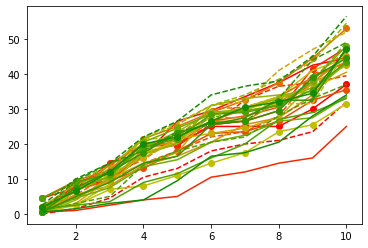

In [8]:
tratamento = 2
bloco = 2

red = Color("red")
colors = list(red.range_to(Color("green"),13))
last_min = []
last_max = []
for t in range(1,13):
    df_plot1 = df_grouped.query("tratamento == {} & bloco == {}".format(t, 1))
    df_plot2 = df_grouped.query("tratamento == {} & bloco == {}".format(t, 2))
    df_plot3 = df_grouped.query("tratamento == {} & bloco == {}".format(t, 3))
    plt.plot(list(df_plot1.colheita)[0], list(df_plot1.n_frutos_cum)[0], "-", color = colors[t-1].get_hex())
    plt.plot(list(df_plot2.colheita)[0], list(df_plot2.n_frutos_cum)[0], "--", color = colors[t-1].get_hex())
    plt.plot(list(df_plot3.colheita)[0], list(df_plot3.n_frutos_cum)[0], "-o", color = colors[t-1].get_hex())
    
    last_min.append(np.min([list(df_plot1.n_frutos_cum)[0][-1], list(df_plot2.n_frutos_cum)[0][-1], list(df_plot3.n_frutos_cum)[0][-1]]))
    last_max.append(np.max([list(df_plot1.n_frutos_cum)[0][-1], list(df_plot2.n_frutos_cum)[0][-1], list(df_plot3.n_frutos_cum)[0][-1]]))
plt.show()

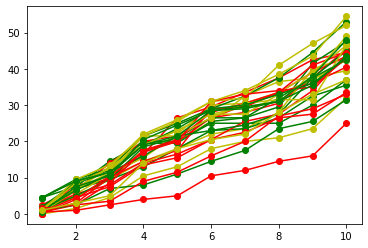

In [201]:
tratamento = 2
bloco = 2

red = Color("red")
colors = list(red.range_to(Color("green"),3))
last_min = []
last_max = []
for t in range(1,11):
    df_plot1 = df_grouped.query("tratamento == {} & bloco == {}".format(t, 1))
    df_plot2 = df_grouped.query("tratamento == {} & bloco == {}".format(t, 2))
    df_plot3 = df_grouped.query("tratamento == {} & bloco == {}".format(t, 3))
    plt.plot(list(df_plot1.colheita)[0], list(df_plot1.n_frutos_cum)[0], "-o", color = colors[0].get_hex())
    plt.plot(list(df_plot2.colheita)[0], list(df_plot2.n_frutos_cum)[0], "-o", color = colors[1].get_hex())
    plt.plot(list(df_plot3.colheita)[0], list(df_plot3.n_frutos_cum)[0], "-o", color = colors[2].get_hex())
    
    last_min.append(np.min([list(df_plot1.n_frutos_cum)[0][-1], list(df_plot2.n_frutos_cum)[0][-1], list(df_plot3.n_frutos_cum)[0][-1]]))
    last_max.append(np.max([list(df_plot1.n_frutos_cum)[0][-1], list(df_plot2.n_frutos_cum)[0][-1], list(df_plot3.n_frutos_cum)[0][-1]]))

plt.show()

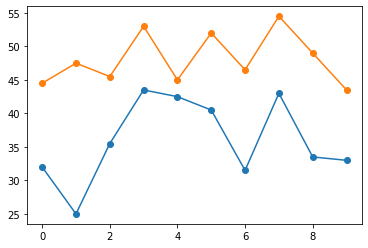

In [202]:
plt.plot(last_min, '-o')
plt.plot(last_max, '-o')
plt.show()

In [203]:
df_grouped.query("tratamento == {} & bloco == {}".format(2, 1))

,tratamento,bloco,colheita,n_frutos,n_frutos_cum,peso,comprimento,largura
3,2,1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.5, 0.5, 1.5, 1.5, 1.0, 5.5, 1.5, 2.5, 1.5, ...","[0.5, 1.0, 2.5, 4.0, 5.0, 10.5, 12.0, 14.5, 16...","[15.5, 19.0, 112.0, 48.5, 157.0, 1132.5, 476.5...","[33.0, 39.0, 39.3333333333333, 30.666666666666...","[43.0, 38.0, 50.3333333333333, 40.0, 88.0, 78...."


In [206]:
last_n_frutos_values = [
    df_grouped.n_frutos_cum[i][-1] for i in range(df_grouped.shape[0])
]

df_aux = pd.DataFrame({"tratamento": df_grouped.tratamento, "bloco": list(df_grouped.bloco), "l": last_n_frutos_values})

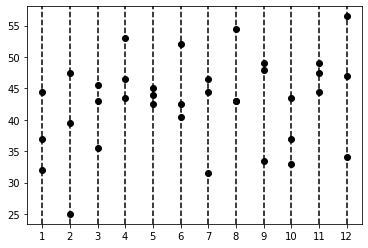

In [207]:
for i in range(1,13):
    plt.axvline(i, color = "black", linestyle = "dashed")
plt.plot(df_aux.tratamento, df_aux.l, "o", color = "black")
plt.xticks(np.arange(1,13))

plt.show()

In [175]:
df_aux.to_csv("df_aux.csv", index = False)

In [195]:
df_aux.head()

,tratamento,bloco,l
0,1,1,44.5
1,1,2,32.0
2,1,3,37.0
3,2,1,25.0
4,2,2,39.5


In [268]:
df_aux = pd.read_csv("df_aux.csv")

Considerando as 3 última observações da variável n_frutos_cum no tempo

In [269]:
repl = pd.DataFrame( df_grouped.n_frutos_cum.apply(lambda x : list(x[-3:]) ) )
df_aux = pd.concat([df_aux, repl], axis = 1).drop(columns = "l")

In [271]:
df_aux = df_aux.explode("n_frutos_cum")
df_aux.head(2)

,tratamento,bloco,n_frutos_cum
0,1,1,37.5
0,1,1,42.5


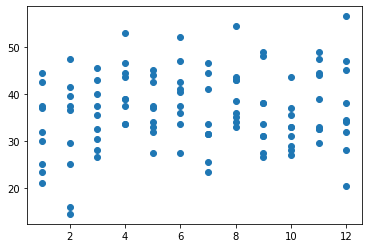

In [273]:
plt.plot(df_aux.tratamento, df_aux.n_frutos_cum, "o")
plt.show()

In [274]:
df_aux.to_csv("df_aux.csv", index = False)